In [1]:
from google.colab import files
uploaded = files.upload()


Saving movies_updated.csv to movies_updated.csv


In [2]:
import pandas as pd


df = pd.read_csv("movies_updated.csv")


df.rename(columns={'runtime,,': 'runtime'}, inplace=True)


df = df.dropna(subset=["budget", "gross", "score", "votes"])


df['gross'] = df['gross'].astype(float)
df['budget'] = df['budget'].astype(float)
df['runtime'] = df['runtime'].str.replace(",", "").astype(float)


df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
import numpy as np


np.random.seed(42)
df["sentiment_score"] = np.random.uniform(-1, 1, len(df))


df[["name", "genre", "sentiment_score"]].head()


,name,genre,sentiment_score
0,The Shining,Drama,-0.250920
1,The Blue Lagoon,Adventure,0.901429
2,Star Wars: Episode V - The Empire Strikes Back,Action,0.463988
3,Airplane!,Comedy,0.197317
4,Caddyshack,Comedy,-0.687963


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

features = df[["budget", "score", "votes", "sentiment_score"]]
target = df["gross"]


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))



R2 Score: 0.5216081221358196
RMSE: 77697142.6502448


/tmp/ipython-input-9-4158524806.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_sentiment.index, y=genre_sentiment.values, palette="viridis")


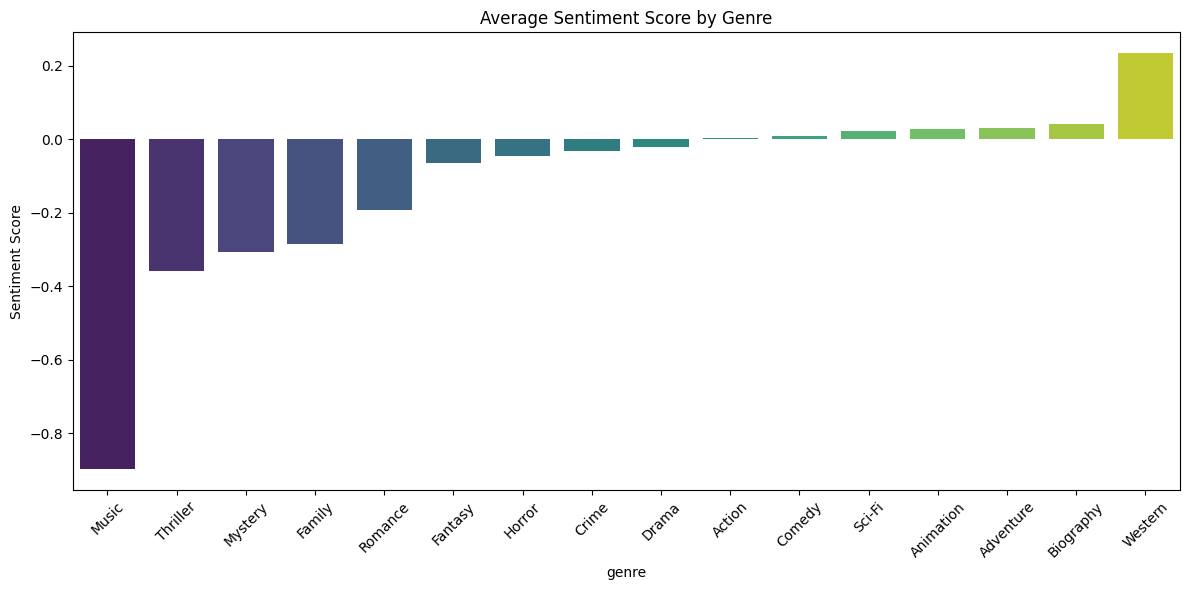

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

genre_sentiment = df.groupby("genre")["sentiment_score"].mean().sort_values()


plt.figure(figsize=(12,6))
sns.barplot(x=genre_sentiment.index, y=genre_sentiment.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Average Sentiment Score by Genre")
plt.ylabel("Sentiment Score")
plt.tight_layout()
plt.show()


In [14]:

df.to_csv("cleaned_movies_with_sentiment.csv", index=False)


with open("prediction_summary.txt", "w") as f:
    f.write("Linear Regression Summary\n")


